# Rainfall Prediction
**Author:** Vyomkesh Vyas  
**Date created:** 14th July 2025

This notebook aims to build a linear model for rainfall prediction in Austin.  

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

We begin our analysis by importing the necessary libraries and loading the dataset. There are around 1319 rows and 20 columns in the dataset. The columns can be categorised as below:  
- **Temperature:** TempHighF, TempAvgF, TempLowF  
- **Dew Point:** DewPointHighF, DewPointAvgF, DewPointLowF  
- **Humidity:** HumidityHighPercent, HumidityAvgPercent, HumidityLowPercent  
- **Sea Level Pressure:** SeaLevelPressureHighInches, SeaLevelPressureAvgInches, SeaLevelPressureLowInches  
- **Visibility:** VisibilityHighMiles, VisibilityAvgMiles, VisibilityLowMiles  
- **Wind Speed:** WindHighMPH, WindAvgMPH, WindGustMPH  
- **PrecipitationSumInches**
- **Events**

In [2]:
# Loading the dataset
aw_df = pd.read_csv('data/austin_weather.csv')

# Displaying the first few rows of the dataset
print(aw_df.shape)
aw_df.head()

(1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


There are no missing values in our data...

In [ ]:
# Checking for missing values
print("Missing values in each column:")
print(aw_df.isnull().sum())

Missing values in each column:
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64


We will drop the 'Events' column and clean the dataset

In [3]:
# Dropping the 'Events' column as it is not numeric and not needed for analysis
aw_df.drop(['Events', 'Date', 'SeaLevelPressureLowInches'], axis=1, inplace=True)

# Cleaning the dataset
aw_df.replace('T', 0.0, inplace=True)
aw_df.replace('-', 0.0, inplace=True)

# Exporting the cleaned dataset to a new CSV file
aw_df.to_csv('data/austin_weather_final.csv', index=False)

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('data/austin_weather_final.csv')
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [9]:
X = data.drop('PrecipitationSumInches', axis=1)
y = data['PrecipitationSumInches']

# Reshaping y
y = y.values.reshape(-1, 1)

day_index= 798
days = [i for i in range(y.size)]

In [10]:
# Initializing the Linear Regression model
clf = LinearRegression()

# Fitting the model
clf.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The precipitation trend graph:


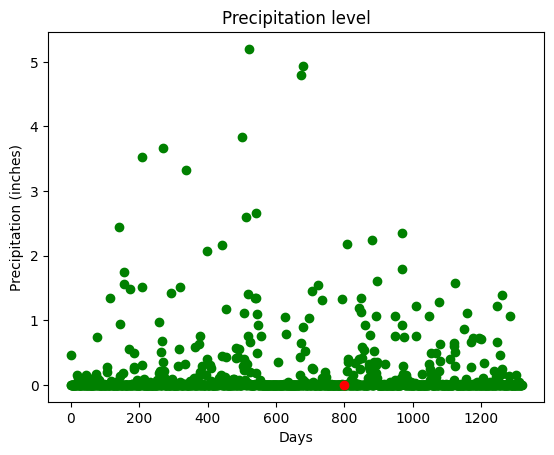

In [15]:
# Plot the graph
print('The precipitation trend graph:')
plt.scatter(days, y, color='g')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation (inches)')
plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'])

The precipitation vs attributes trend graph:


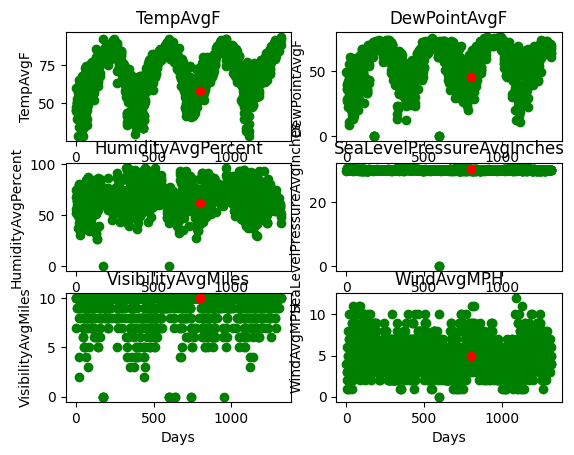

In [24]:
print("The precipitation vs attributes trend graph:")
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])
    plt.xlabel('Days')
    plt.ylabel(x_vis.columns.values[i])
plt.show()